# BFS

In [ ]:
import queue

def Maze1():
    maze = []
    maze.append(["=","=", "O", "=", "=", "=","="])
    maze.append(["="," ", " ", " ", "=", " ","="])
    maze.append(["="," ", "=", " ", "=", " ","="])
    maze.append(["="," ", "=", " ", " ", " ","="])
    maze.append(["="," ", "=", "=", "=", " ","="])
    maze.append(["="," ", " ", " ", "=", " ","="])
    maze.append(["=","=", "=", "=", "=", "X","="])

    return maze

def MazeDesign(maze, path=""):
    for x, pos in enumerate(maze[0]):
        if pos == "O":
            start = x
            
    i = start
    j = 0
    pos = set()
    for move in path:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1
        pos.add((j, i))
    
    for j, row in enumerate(maze):
        for i, col in enumerate(row):
            if (j, i) in pos:
                print("^ ", end="")
            else:
                print(col + " ", end="")
        print()
        


def findEnd(maze, moves):
    for x, pos in enumerate(maze[0]):
        if pos == "O":
            start = x

    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

    if maze[j][i] == "X":
        print("From the start: " + moves)
        MazeDesign(maze, moves)
        return True
    return False

def valid(maze, moves):
    for x, pos in enumerate(maze[0]):
        if pos == "O":
            start = x

    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

        if not(0 <= i < len(maze[0]) and 0 <= j < len(maze)):
            return False
        elif (maze[j][i] == "="):
            return False

    return True

nums = queue.Queue()
nums.put("")
add = ""
maze  = Maze1()

while not findEnd(maze, add): 
    add = nums.get()
    #print(add)
    for j in ["(< Left) ", "(> Right) ", "(^ Up) ", "(v Down) "]:
        put = add + j
        if valid(maze, put):
            nums.put(put)


    # BFS/A* with Turtle 

In [ ]:
import turtle
import time
import sys
from collections import deque

mz = turtle.Screen()
mz.bgcolor("black")
mz.title("BFS")
mz.setup(1300,700)

class Maze(turtle.Turtle):
    def __init__(self):
        turtle.Turtle.__init__(self)
        self.shape("square")
        self.color("white")
        self.penup()
        self.speed(0)

class Green(turtle.Turtle):
    def __init__(self):
        turtle.Turtle.__init__(self)
        self.shape("square")
        self.color("green")
        self.penup()
        self.speed(0)

class Red(turtle.Turtle):
    def __init__(self):
        turtle.Turtle.__init__(self)
        self.shape("square")
        self.color("red")
        self.penup()
        self.speed(0)

class Yellow(turtle.Turtle):
    def __init__(self):
        turtle.Turtle.__init__(self)
        self.shape("square")
        self.color("yellow")
        self.penup()
        self.speed(0)

grid = [
"++++++++++++++++++++",
"+ +++  +++ ++    +++",
"+   ++  ++ +++++   e",
"+++ +++ ++     +++ +",
"++  +   ++++++ + + +",
"+  ++ +++    + + + +",
"+ +++ +++ ++   + + +",
"+ ++   +   +++++ + +",
"+ ++ ++++ +++      +",
"+ +    +      ++++++",
"+ + ++ + + +++++ +++",
"+ + +  +  +++++    +",
"+ +++         + ++ +",
"+ +   +++ +++ + +  +",
"+ + ++++  +++ +++ ++",
"+ +    ++++++++   ++",
"+ ++++   ++   ++ +++",
"+ +         ++++  ++",
"+s  +++++ +        +",
"++++++++++++++++++++"
]

def maze_setup(grid):
    global start_x, start_y, end_x, end_y
    for y in range(len(grid)):
        for x in range(len(grid[y])):
            character = grid[y][x]
            screen_x = -588 + (x * 24)
            screen_y = 288 - (y * 24)

            if character == "+":
                maze.goto(screen_x, screen_y)
                maze.stamp()
                walls.append((screen_x, screen_y))

            if character == " " or character == "e":
                legacy.append((screen_x, screen_y))
            if character == "e":
                green.color("purple")
                green.goto(screen_x, screen_y)
                end_x, end_y = screen_x,screen_y
                green.stamp()
                green.color("green")

            if character == "s":
                start_x, start_y = screen_x, screen_y
                red.goto(screen_x, screen_y)


def endProgram():
    mz.exitonclick()
    sys.exit()

def search(x,y):
    route.append((x, y))
    solution[x,y] = x,y

    while len(route) > 0:
        time.sleep(0)
        x, y = route.popleft()

        if(x - 24, y) in legacy and (x - 24, y) not in occupied:
            cell = (x - 24, y)
            solution[cell] = x, y
            route.append(cell)
            occupied.add((x-24, y))

        if(x + 24, y) in legacy and (x + 24, y) not in occupied:
            cell = (x + 24, y)
            solution[cell] = x, y
            route.append(cell)
            occupied.add((x +24, y))

        if (x, y - 24) in legacy and (x, y - 24) not in occupied:
            cell = (x, y - 24)
            solution[cell] = x, y
            route.append(cell)
            occupied.add((x, y - 24))
            print(solution)

        if(x, y + 24) in legacy and (x, y + 24) not in occupied:
            cell = (x, y + 24)
            solution[cell] = x, y
            route.append(cell)
            occupied.add((x, y + 24))

        green.goto(x,y)
        green.stamp()


def backTrack(x, y):
    yellow.goto(x, y)
    yellow.stamp()
    while (x, y) != (start_x, start_y):
        yellow.goto(solution[x, y])
        yellow.stamp()
        x, y = solution[x, y]

maze = Maze()
red = Red()
green = Green()
yellow = Yellow()

walls = []
legacy = []
occupied = set()
route = deque()
solution = {}

maze_setup(grid)
search(start_x,start_y)
backTrack(end_x, end_y)
mz.exitonclick()

# DFS with A* Heuristic

DFS or A*?DFS
Enter Starting x value: 0
Enter Starting y value: 2
Enter Goal x value: 5
Enter Goal y value: 4
Pathway of Game:  [(0, 1), (0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4)]
Enter x values of pathway (enter space to stop input):0
Enter x values of pathway (enter space to stop input):0
Enter x values of pathway (enter space to stop input):1
Enter x values of pathway (enter space to stop input):1
Enter x values of pathway (enter space to stop input):1
Enter x values of pathway (enter space to stop input):1
Enter x values of pathway (enter space to stop input):1
Enter x values of pathway (enter space to stop input):2
Enter x values of pathway (enter space to stop input):3
Enter x values of pathway (enter space to stop input):4
Enter x values of pathway (enter space to stop input):5
Enter x values of pathway (enter space to stop input): 
Done Entering X Values of Pathway!
Enter y values of pathway (enter space to stop input):1
Enter y values of pa

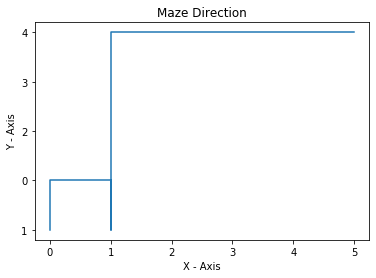

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
from queue import PriorityQueue
from celluloid import Camera
from matplotlib import animation
from IPython.display import HTML

def dfs(coordinates, start, goalNode):
    pathway = []
    done = []
    stack = PriorityQueue()
    stack.put((0, start, pathway, done))
    
    while not stack.empty():
        depth, current_node, pathway, done = stack.get()
        
        if current_node == goalNode:
            return pathway + [current_node]
        
        done = done + [current_node]
        
        child_nodes = coordinates[current_node]
        
        for node in child_nodes:
            if node not in done:
                if node == goalNode:
                    return pathway + [node]
                depth_of_node = len(pathway)
                stack.put((-depth_of_node, node, pathway + [node], done + [node]))

    return pathway

class Node():

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    open_list = []
    closed_list = []

    open_list.append(start_node)

    while len(open_list) > 0:

        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        open_list.pop(current_index)
        closed_list.append(current_node)

        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] 

        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:

            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            new_node = Node(current_node, node_position)
            children.append(new_node)

        for child in children:
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            a = child.position[0] - end_node.position[0] 
            b = child.position[1] - end_node.position[1]
            child.g = current_node.g + 1
            child.h = (a ** 2) + (b ** 2)
            child.f = child.h + child.g

            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            open_list.append(child)

maze = [[0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 0, 1],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0]]
coordinates = {
    (0,0): set([(0,1), (1,0)]),
    (0,1): set([(0,0), (1,1), (0,2)]),
    (0,2): set([(0,1), (1,2), (0,3)]),
    (0,3): set([(0,2), (1,3)]),
    (0,5): set([(1,5)]),
    (1,0): set([(0,0), (1,1)]),
    (1,1): set([(1,2), (2,1)]),
    (1,2): set([(2,2), (1,3)]),
    (1,3): set([(1,4), (1,2)]),
    (1,4): set([(1,3), (2,4)]),
    (1,5): set([(1,4), (2,5)]),
    (2,1): set([(1,1), (3,1)]),
    (2,2): set([(1,2)]),
    (2,4): set([(1,4), (3,4)]),
    (2,5): set([(3,5), (2,4),(1,5)]),
    (3,0): set([(3,1), (4,0)]),
    (3,1): set([(2,1), (3,2)]),
    (3,2): set([(3,1),(4,2)]),
    (3,4): set([(2,4),(4,4)]),
    (3,5): set([(3,4), (4,5),(2,5)]),
    (4,0): set([(3,0), (5,0)]),
    (4,2): set([(4,3),(5,2),(3,2)]),
    (4,3): set([(4,2), (4,4)]),
    (4,4): set([(3,4), (4,3),(5,4),(4,5)]),
    (4,5): set([(5,5), (3,5),(4,4)]),
    (5,0): set([(4,0), (5,1)]),
    (5,1): set([(5,2)]),
    (5,2): set([(5,1),(4,2)]),
    (5,4): set([(4,4)]),
    (5,5): set([(4,4),(5,4)]),
}

def graph():
    x_values = []
    y_values = []
    while True:
        x = input("Enter x values of pathway (enter space to stop input):")
        if x == " ":
            print("Done Entering X Values of Pathway!")
            while True:
                y = input("Enter y values of pathway (enter space to stop input):")
                if y == " ":
                    print("Done Entering Y Values of Pathway!")
                    break
                else:
                    y_values.append(y)
            break
        else:
            x_values.append(x)

    print(x_values)
    print(y_values)
    
    plt.title('Maze Direction')   
    plt.xlabel('X - Axis') 
    plt.ylabel('Y - Axis') 
    x = x_values
    y = y_values
      
    plt.plot(x, y) 
  
    plt.show()
    
answer = input("DFS or A*?")
if answer == "DFS":
    sx = int(input("Enter Starting x value: "))
    sy = int(input("Enter Starting y value: "))
    gx = int(input("Enter Goal x value: "))
    gy = int(input("Enter Goal y value: "))
    pathway = dfs(coordinates, (sx,sy), (gx,gy))
    print("Pathway of Game: ",pathway)
    graph()
    
elif answer == "A*":
    sx = int(input("Enter Starting x value: "))
    sy = int(input("Enter Starting y value: "))
    gx = int(input("Enter Goal x value: "))
    gy = int(input("Enter Goal y value: "))
    path = astar(maze, (sx,sy), (gx,gy))
    print("Pathway of Game: ",path)
    graph()
else: 
    print("Invalid format of answer !")


    # Turtle implementation of the maze of DFS/A*

In [2]:
import turtle

mz = turtle.Screen()
mz.bgcolor("white")
mz.title("A BFS Maze Solving Program")
mz.setup(700,700)

class Maze(turtle.Turtle):
    def __init__(self):
        turtle.Turtle.__init__(self)
        self.shape("square")
        self.color("black")
        self.penup()
        self.speed(0.75)
        
class Red(turtle.Turtle):
    def __init__(self):
        turtle.Turtle.__init__(self)
        self.shape("turtle")
        self.color("red")
        self.penup()
        self.speed(0.75)

levels = [""]

grid = [
"XXXXXXXX",
"X      X",
"XW     X",
"X  WW WX",
"X      X",
"X    W X",
"X  W   X",
"XXXXXXXX"
]

levels.append(grid)

def createGrid(level):
    for y in range(len(level)):
        for x in range(len(level[y])):
            block = level[y][x]
            screen_x = -288 + (x*24)
            screen_y = 288 - (y*24)
            
            if block == "X":
                pen.goto(screen_x,screen_y)
                pen.stamp()
            elif block == "W":
                red.goto(screen_x,screen_y)
                red.stamp()
pen = Maze()
red = Red()
createGrid(levels[1])
mz.exitonclick()
turtle.done()

Terminator: 